#Lazada Indonesian Reviews


##Latar Belakang Dataset

Penulis mengerjakan tesis sarjana tentang analisis sentimen menggunakan kumpulan data pertama penulis yang diterbitkan di Kaggle, Ulasan Telepon Seluler Amazon. Sebelum memutuskan untuk menggunakan dataset tersebut, penulis berencana menggunakan review produk Indonesia di toko online, salah satunya dari Lazada Indonesia. Karena tidak banyak ulasan produk dalam bahasa Indonesia, penulis memutuskan untuk memulai pengumpulan dataset ini menggunakan kategori produk Lazada Indonesia yang sangat luas

## Pertanyaan Analisis

Kategori manakah yang memiliki total review paling banyak ?

##EDA (Exploratory Data Analysis)

In [20]:
import pandas as pd                           
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df = pd.read_csv('/content/20191002-items.csv')
df.head() 

,itemId,category,name,brandName,url,price,averageRating,totalReviews,retrievedDate
0,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free B...",Toshiba,https://www.lazada.co.id/products/toshiba-smar...,2499000,4,8,2019-10-02
1,100003785,beli-harddisk-eksternal,"TOSHIBA Full HD Smart LED TV 40"" - 40L5650VJ -...",Toshiba,https://www.lazada.co.id/products/toshiba-full...,3788000,3,3,2019-10-02
2,100004132,beli-harddisk-eksternal,Samsung 40 Inch Full HD Flat LED Digital TV 4...,LG,https://www.lazada.co.id/products/samsung-40-i...,3850000,3,2,2019-10-02
3,100004505,beli-harddisk-eksternal,"Sharp HD LED TV 24"" - LC-24LE175I - Hitam",Sharp,https://www.lazada.co.id/products/sharp-hd-led...,1275000,3,11,2019-10-02
4,100005037,beli-harddisk-eksternal,Lenovo Ideapad 130-15AST LAPTOP MULTIMEDIA I A...,Lenovo,https://www.lazada.co.id/products/lenovo-ideap...,3984100,5,1,2019-10-02


###Tujuan Analisis Data
Untuk mengetahui apa saja yang terdapat di dalam dataset, sehingga dapat memudahkan untuk menentukan kategori transaksi yang memiliki jumlah total review terbanyak

###Memahami Dataset

1. **itemId** : Nomor Id produk
2. **category** : Kategori transaksi
3. **name** : Nama produk
4. **brandName** : Label produk
5. **url** : Alamat produk di Lazada
6. **price** : Harga
7. **averageRating** : Rata-rata rating
8. **totalReviews** : Total ulasan 
9. **retrievedDate** : Tanggal diambilnya data tersebut

###Dimensi Data

In [22]:
df.shape

(10942, 9)

Terdapat 9 kolom dan 10942 baris

###Variable Pada Dataset

In [23]:
df.columns.values 

array(['itemId', 'category', 'name', 'brandName', 'url', 'price',
       'averageRating', 'totalReviews', 'retrievedDate'], dtype=object)

In [24]:
df.dtypes

itemId            int64
category         object
name             object
brandName        object
url              object
price             int64
averageRating     int64
totalReviews      int64
retrievedDate    object
dtype: object

In [25]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10942 entries, 0 to 10941
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   itemId         10942 non-null  int64 
 1   category       10942 non-null  object
 2   name           10942 non-null  object
 3   brandName      10940 non-null  object
 4   url            10942 non-null  object
 5   price          10942 non-null  int64 
 6   averageRating  10942 non-null  int64 
 7   totalReviews   10942 non-null  int64 
 8   retrievedDate  10942 non-null  object
dtypes: int64(4), object(5)
memory usage: 769.5+ KB


###Mengecek Missing Data

In [26]:
df.isnull().sum()

itemId           0
category         0
name             0
brandName        2
url              0
price            0
averageRating    0
totalReviews     0
retrievedDate    0
dtype: int64

Kolom yang missing data adalah kolom brandName

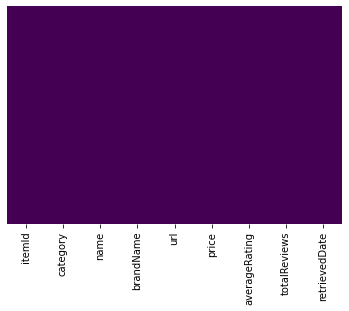

In [27]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

###Mengecek Outlier

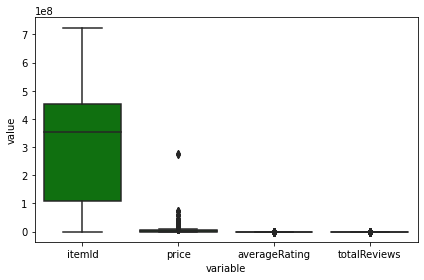

In [28]:
df1=df.select_dtypes(include=['float64', 'int64'])#Memilih kolom numerik

sns.boxplot(x="variable", y="value", color='green',orient='v', data=pd.melt(df1))
plt.tight_layout()

Kolom numeric yang memiliki outlier adalah itemId, price, averageRating, dan totalReviews

###Melihat Korelasi Data

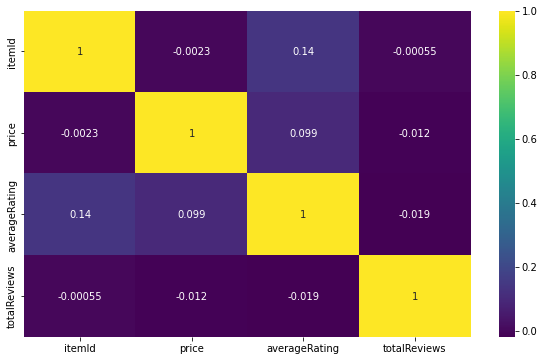

In [29]:
k = len(df1.columns)
cm = df1.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

###Melihat Statistik Data

In [30]:
df.describe()

,itemId,price,averageRating,totalReviews
count,1.094200e+04,1.094200e+04,10942.000000,10942.000000
mean,2.936823e+08,3.020219e+06,4.171632,27.369494
std,2.090568e+08,6.681453e+06,1.032055,260.253817
min,6.068000e+03,1.000000e+03,1.000000,1.000000
25%,1.082924e+08,7.920000e+04,4.000000,1.000000
50%,3.540792e+08,1.095000e+06,4.000000,2.000000
75%,4.527141e+08,3.959000e+06,5.000000,7.000000
max,7.242170e+08,2.750000e+08,5.000000,9631.000000


### Plot Distribusi Data Numerik

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

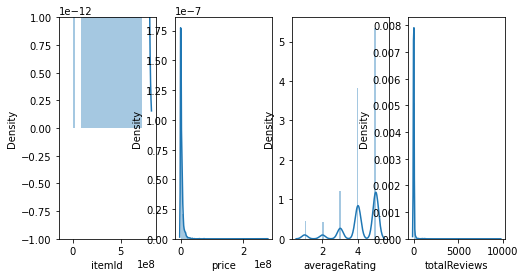

In [31]:
l = df1.columns.values
number_of_columns=len(df1.columns)
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 

###Pairplot

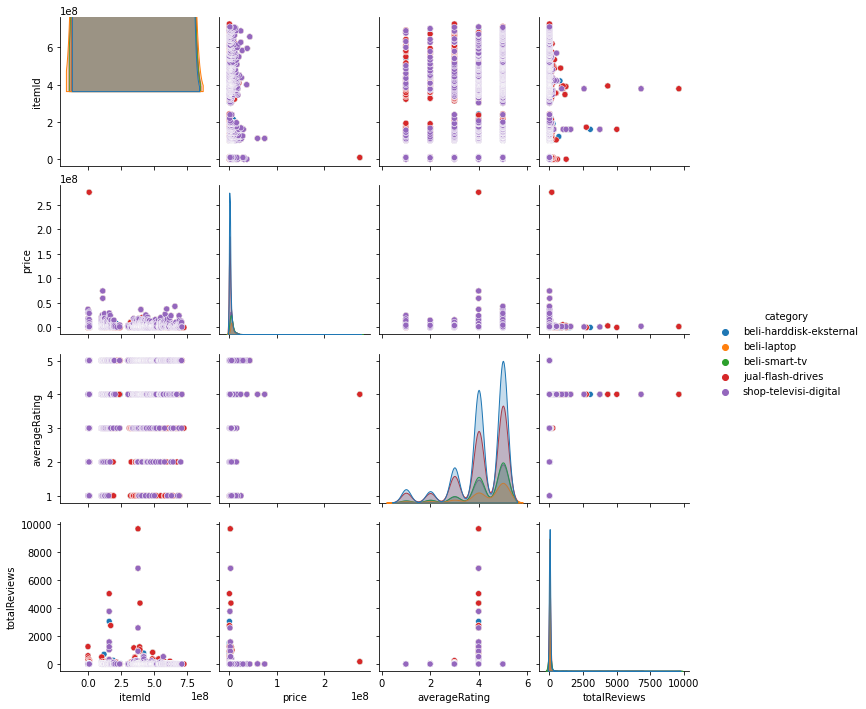

In [32]:
g = sns.pairplot(df, hue="category")

## Data Preparation

###Seleksi Kolom

In [33]:
df=df.drop(columns=['itemId', 'url', 'averageRating', 'retrievedDate', 'price', 'name', 'brandName'])
df.head()

,category,totalReviews
0,beli-harddisk-eksternal,8
1,beli-harddisk-eksternal,3
2,beli-harddisk-eksternal,2
3,beli-harddisk-eksternal,11
4,beli-harddisk-eksternal,1


### Melakukan Pengkodean(Encoding)

In [51]:
hasil=df.groupby('category').sum() 
hasil

,totalReviews
category,
beli-harddisk-eksternal,114417
beli-laptop,5777
beli-smart-tv,53070
jual-flash-drives,94007
shop-televisi-digital,32206


In [52]:
Jumlah_Total_Reviews = hasil.sum()
Jumlah_Total_Reviews

totalReviews    299477
dtype: int64

Total review untuk seluruh kategori adalah **299477**

In [53]:
Total_Reviews = hasil.max()
Total_Reviews

totalReviews    114417
dtype: int64

Total review terbanyak adalah **114417**

In [14]:
Total_Reviews = hasil.min()
Total_Reviews

totalReviews    5777
dtype: int64

Total review terendah adalah **5777**

####Jadi, kategori dengan total review terbanyak adalah **beli-harddisk-eksternal** dengan jumlah total reviewnya sebanyak **114417**

## Data Visualization

In [15]:
import plotly.graph_objects as go

labels = ['beli harddisk eksternal','beli laptop','beli smart tv', 'jual flash drives','shop televisi digital']
values = [114417, 5777, 53070, 94007, 32206]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()